In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [18]:
df = pd.read_csv("/Users/EthanMcElhone/Downloads/data-1.csv") 
df.head()

,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex
0,valley floor / meadow,0,0,0.0174,0.0131,0.0108,0.0133,0.0158,0.0144,0.0151,...,0.0237,0.0231,0.0224,0.0246,0.0255,0.0174,0.0234,0.0147,#030B05,#25C77140
1,valley floor / meadow,1,0,0.0180,0.0124,0.0116,0.0143,0.0154,0.0136,0.0151,...,0.0289,0.0275,0.0288,0.0293,0.0286,0.0211,0.0229,0.0176,#040A09,#25C77140
2,valley floor / meadow,2,0,0.0151,0.0150,0.0113,0.0158,0.0167,0.0158,0.0163,...,0.0358,0.0319,0.0355,0.0274,0.0303,0.0232,0.0282,0.0181,#08110B,#25C77140
3,valley floor / meadow,3,0,0.0172,0.0149,0.0095,0.0156,0.0154,0.0169,0.0176,...,0.0310,0.0294,0.0307,0.0238,0.0304,0.0232,0.0247,0.0087,#0C160C,#25C77140
4,valley floor / meadow,4,0,0.0184,0.0149,0.0143,0.0189,0.0174,0.0174,0.0182,...,0.0428,0.0372,0.0407,0.0344,0.0415,0.0287,0.0317,0.0176,#0E180C,#25C77140


In [19]:
df["land_type"].unique()

array(['valley floor / meadow', 'alpine meadow', 'alpine tundra',
       'veg-scree mix', 'bare rock', 'scree / sunlit rock', 'dark rock',
       'snow / ice'], dtype=object)

In [20]:
land_mapping = {
    'valley floor / meadow': 0,
    'alpine meadow': 1,
    'alpine tundra': 2,
    'veg-scree mix': 3,
    'bare rock': 4,
    'scree / sunlit rock': 5,
    'dark rock': 6,
    'snow / ice': 7
}

df["land_type"] = df["land_type"].map(land_mapping)

In [21]:
df["land_type"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [22]:
Y = df["land_type"]

X = df.drop(columns = ["land_type", "rgb_hex", "overlay_hex"]) 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [ ]:
apply_pca = True

if apply_pca:
    pca = PCA(n_components = 10, random_state=42)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

In [25]:
xgb = xgb.XGBClassifier(
    objective = 'multi:softprob',    
    n_estimators = 300,
    max_depth = 6,
    learning_rate = 0.1,
    seed = 42,
    eval_metric = 'mlogloss',        
    early_stopping_rounds = 10,
    missing = np.nan)


xgb.fit(
    X_train,
    Y_train,
    eval_set = [(X_test, Y_test)],
    verbose = True)

[0]	validation_0-mlogloss:1.82771
[1]	validation_0-mlogloss:1.66228
[2]	validation_0-mlogloss:1.52873
[3]	validation_0-mlogloss:1.41461
[4]	validation_0-mlogloss:1.31748
[5]	validation_0-mlogloss:1.23155
[6]	validation_0-mlogloss:1.15729
[7]	validation_0-mlogloss:1.09119
[8]	validation_0-mlogloss:1.03279
[9]	validation_0-mlogloss:0.97923
[10]	validation_0-mlogloss:0.93137
[11]	validation_0-mlogloss:0.88776
[12]	validation_0-mlogloss:0.84841
[13]	validation_0-mlogloss:0.81251
[14]	validation_0-mlogloss:0.77834
[15]	validation_0-mlogloss:0.74866
[16]	validation_0-mlogloss:0.72066
[17]	validation_0-mlogloss:0.69416
[18]	validation_0-mlogloss:0.66982
[19]	validation_0-mlogloss:0.64622
[20]	validation_0-mlogloss:0.62441
[21]	validation_0-mlogloss:0.60386
[22]	validation_0-mlogloss:0.58378
[23]	validation_0-mlogloss:0.56454
[24]	validation_0-mlogloss:0.54728
[25]	validation_0-mlogloss:0.53160
[26]	validation_0-mlogloss:0.51418
[27]	validation_0-mlogloss:0.49928
[28]	validation_0-mlogloss:0.4

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'mlogloss'


In [26]:
print("Best iteration:", xgb.get_booster().best_iteration)
print("Best score:", xgb.get_booster().best_score)

Best iteration: 299
Best score: 0.10033818527128129


In [27]:
Y_test = pd.DataFrame(Y_test)

Y_test["predicted"] =  xgb.predict(X_test)

Y_test

,land_type,predicted
19906,2,2
124630,2,2
160459,3,3
123665,0,0
120034,5,5
...,...,...
121799,3,3
49550,2,2
67010,2,2
73533,0,0


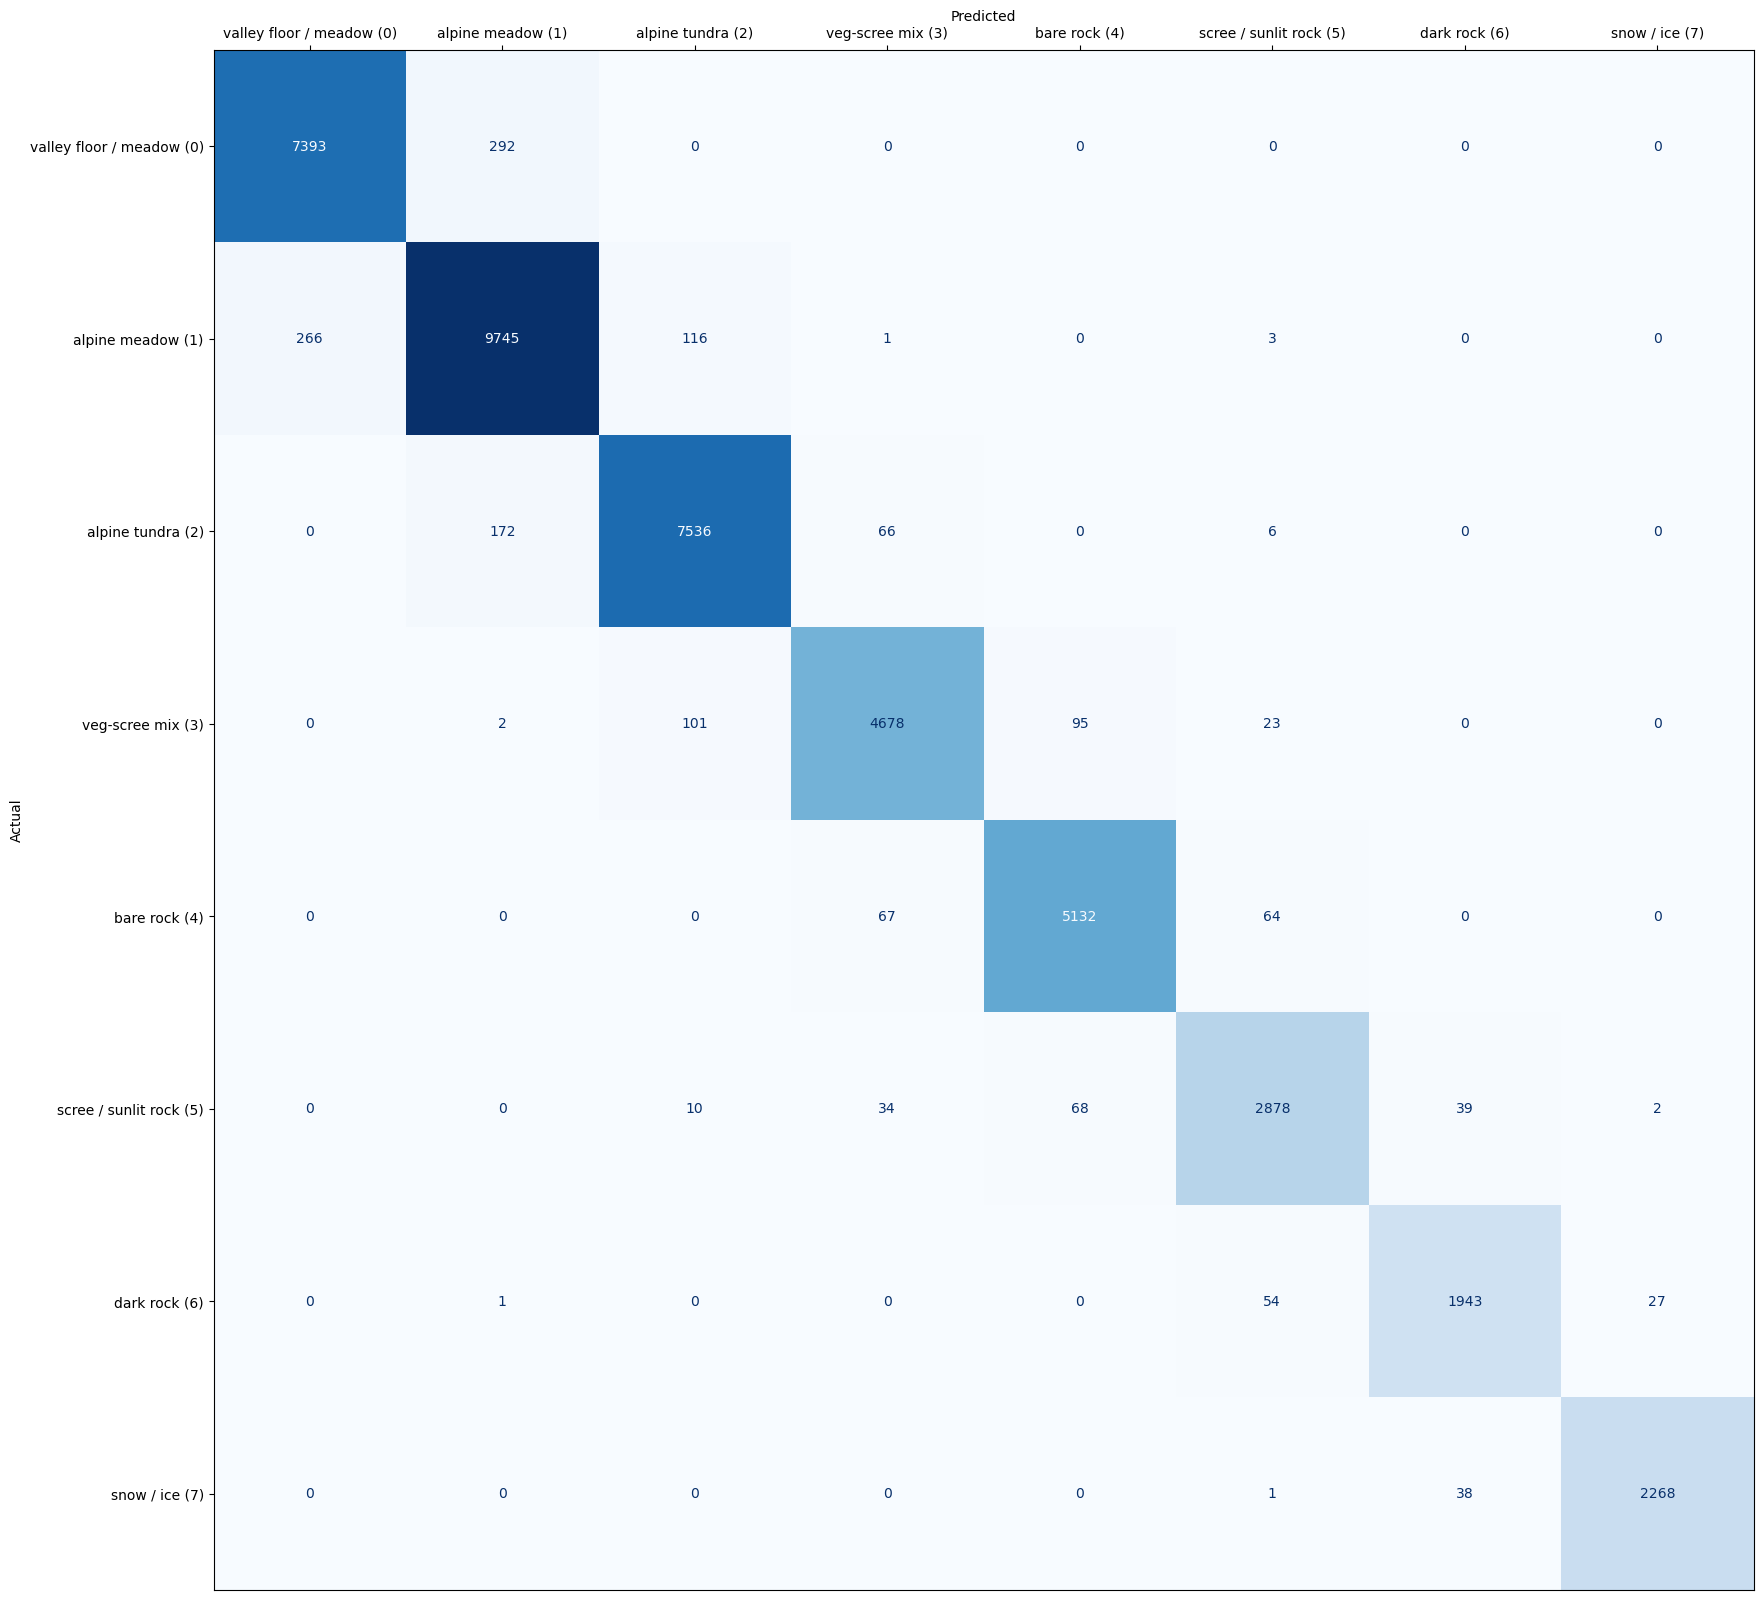

In [28]:
land_type = ["valley floor / meadow (0)", "alpine meadow (1)", "alpine tundra (2)", "veg-scree mix (3)", 
             "bare rock (4)", "scree / sunlit rock (5)", "dark rock (6)", "snow / ice (7)"]

fig, ax = plt.subplots(figsize=(30, 20))

Confusion_Matrix = ConfusionMatrixDisplay.from_predictions(y_true = Y_test["land_type"],
                                                           y_pred = Y_test["predicted"],
                                                           labels = [0,1,2,3,4,5,6,7],
                                                           display_labels = land_type,
                                                           colorbar = False,
                                                           cmap = "Blues",
                                                           ax = ax)

plt.xlabel("Predicted")
plt.ylabel("Actual")
ax = Confusion_Matrix.ax_
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
plt.show()

In [29]:
misclassification = 1 - accuracy_score(Y_test["land_type"], Y_test["predicted"])
print(f"Overall Misclassification Error Rate: {misclassification:4f}")

Overall Misclassification Error Rate: 0.035899


In [30]:
precision_macro = precision_score(Y_test["land_type"], Y_test["predicted"], average='macro')
print(f"Macro-Average Precision: {precision_macro:.4f}")

precision_weighted = precision_score(Y_test["land_type"], Y_test["predicted"], average='weighted')
print(f"Weighted-Average Precision: {precision_weighted:.4f}")

Macro-Average Precision: 0.9655
Weighted-Average Precision: 0.9641


In [31]:
recall_macro = recall_score(Y_test["land_type"], Y_test["predicted"], average='macro')
print(f"Macro-Average Recall: {recall_macro:4f}")

recall_weighted = recall_score(Y_test["land_type"], Y_test["predicted"], average='weighted')
print(f"Weighted-Average Recall: {recall_weighted:4f}")

Macro-Average Recall: 0.964333
Weighted-Average Recall: 0.964101


In [ ]:
y_true = Y_test["land_type"].values
y_pred = Y_test["predicted"].values
y_prob = xgb.predict_proba(X_test) 

balanced_accuracies = []
f1_scores = []
aucs = []

for k in range(8):
    y_true_k = (y_true == k).astype(int)
    y_pred_k = (y_pred == k).astype(int)
    y_prob_k = y_prob[:, k]
    
    balanced_accuracies.append(balanced_accuracy_score(y_true_k, y_pred_k))
    f1_scores.append(f1_score(y_true_k, y_pred_k))
    aucs.append(roc_auc_score(y_true_k, y_prob_k))

avg_balanced_accuracy = np.mean(balanced_accuracies)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(aucs)

print(f"Average Balanced Accuracy: {avg_balanced_accuracy:4f}")
print(f"Average F1 Score: {avg_f1:4f}")
print(f"Average AUC: {avg_auc:4f}")

Average Balanced Accuracy: 0.979470
Average F1 Score: 0.964924
Average AUC: 0.999297
